In [1]:
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

all_weaks = ["物理", "火", "冰", "雷", "风", "量子", "虚数"]
file0 = "0.弱点参考.txt"; file1 = "1.千面英雄.txt"

In [2]:
def get_boss_to_weak(): # 构建敌人-弱点对应表
    with open(file0, 'r', encoding = 'utf-8') as f: lines = f.readlines()
    boss_to_weak = {}
    for line in lines: # 每行为"Boss: weak1 weak2..."
        line = line.strip().split(':')
        boss = line[0]; weaks = line[1].split()
        boss_to_weak[boss] = weaks
    return boss_to_weak

boss_to_weak = get_boss_to_weak()

In [3]:
def get_weak_to_count(boss_to_weak): # 构建弱点-数量对应表
    with open(file1, 'r', encoding = 'utf-8') as f: lines = f.readlines()
    weak_to_count = {weak: 0 for weak in all_weaks}
    for line in lines: # 每行为"Boss1 Boss2 Boss3"
        bosses = line.strip().split()
        for boss in bosses: # 查阅
            weaks = boss_to_weak.get(boss, [])
            for weak in weaks: weak_to_count[weak] += 1
    return weak_to_count

weak_to_count = get_weak_to_count(boss_to_weak)

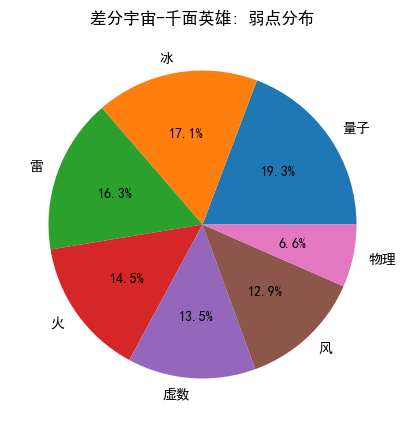

In [4]:
def draw(weak_to_count): # 绘制饼状图
    weak_to_count = sorted(weak_to_count.items(), key = lambda x: x[1], reverse = True)
    weaks = [item[0] for item in weak_to_count]; count = [item[1] for item in weak_to_count]
    plt.figure(figsize = (5, 5)); plt.pie(count, labels = weaks, autopct = '%1.1f%%')
    plt.title("差分宇宙-千面英雄: 弱点分布"); plt.show()

draw(weak_to_count)